In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
import numpy as np
from LinearMPC_template.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 0.05
sim_time = 1
H = 10
wx, wy, wz, alpha, beta, gama,  vx, vy, vz, x, y, z = range(12)
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x0[vx] = 5
x0[vy] = 5
x0[vz] = 5
x0[gama] = 30

x_target = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)

xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear", x_target=x_target
)

# vis = RocketVis(rocket, rocket_obj_path)
# vis.anim_rate = 1.0
# vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[:, :-1], X_ol=x_ol, U_ol=u_ol)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Computing maximum invariant set ...
Iteration 1... not yet converged
Iteration 2... not yet converged
Iteration 3... not yet converged
Iteration 4... not yet converged
Iteration 5... not yet converged
Iteration 6... not yet converged
Iteration 7... not yet converged


h_l[i] and h_u[i] are both close to -/+ infinity for i = 0 (and potentially other indices).
PIQP is setting the corresponding rows in G to zero (sparsity structure preserving).
Consider removing the corresponding constraints for faster solves.
h_l[i] and h_u[i] are both close to -/+ infinity for i = 0 (and potentially other indices).
PIQP is setting the corresponding rows in G to zero (sparsity structure preserving).
Consider removing the corresponding constraints for faster solves.


Iteration 8... not yet converged
Iteration 9... not yet converged
Maximum invariant set successfully computed after 10 iterations.
Computing maximum invariant set ...
Iteration 1... not yet converged
Iteration 2... not yet converged
Iteration 3... not yet converged
Iteration 4... not yet converged
Iteration 5... not yet converged
Iteration 6... not yet converged
Iteration 7... not yet converged
Iteration 8... not yet converged
Iteration 9... not yet converged
Maximum invariant set successfully computed after 10 iterations.
Computing maximum invariant set ...
Iteration 1... not yet converged
Iteration 2... not yet converged
Iteration 3... not yet converged
Iteration 4... not yet converged
Iteration 5... not yet converged
Iteration 6... not yet converged
Iteration 7... not yet converged
Iteration 8... not yet converged
Iteration 9... not yet converged
Iteration 10... not yet converged
Iteration 11... not yet converged
Iteration 12... not yet converged
Iteration 13... not yet converged
It

h_l[i] and h_u[i] are both close to -/+ infinity for i = 0 (and potentially other indices).
PIQP is setting the corresponding rows in G to zero (sparsity structure preserving).
Consider removing the corresponding constraints for faster solves.


Iteration 23... not yet converged
Iteration 24... not yet converged
Iteration 25... not yet converged
Iteration 26... not yet converged
Iteration 27... not yet converged
Iteration 28... not yet converged
Iteration 29... not yet converged
Iteration 30... not yet converged
Maximum invariant set successfully computed after 31 iterations.
Computing maximum invariant set ...
Iteration 1... not yet converged
Iteration 2... not yet converged
Iteration 3... not yet converged
Iteration 4... not yet converged
Iteration 5... not yet converged
Iteration 6... not yet converged
Iteration 7... not yet converged
Iteration 8... not yet converged
Iteration 9... not yet converged
Iteration 10... not yet converged


h_l[i] and h_u[i] are both close to -/+ infinity for i = 0 (and potentially other indices).
PIQP is setting the corresponding rows in G to zero (sparsity structure preserving).
Consider removing the corresponding constraints for faster solves.


Iteration 11... not yet converged
Iteration 12... not yet converged
Iteration 13... not yet converged
Iteration 14... not yet converged
Iteration 15... not yet converged
Iteration 16... not yet converged
Iteration 17... not yet converged
Iteration 18... not yet converged
Iteration 19... not yet converged
Iteration 20... not yet converged
Iteration 21... not yet converged
Iteration 22... not yet converged
Iteration 23... not yet converged
Iteration 24... not yet converged
Iteration 25... not yet converged
Iteration 26... not yet converged
Iteration 27... not yet converged
Iteration 28... not yet converged
Iteration 29... not yet converged
Iteration 30... not yet converged
Iteration 31... not yet converged
Iteration 32... not yet converged
Iteration 33... not yet converged
Iteration 34... not yet converged
Iteration 35... not yet converged
Iteration 36... not yet converged
Iteration 37... not yet converged
Iteration 38... not yet converged
Iteration 39... not yet converged
Iteration 40..

/Users/jverbois/Python/epfl/MPC-Course-EPFL/.venv/lib/python3.12/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


KeyboardInterrupt: 

29.98793401378624


/var/folders/k5/xxb7__bn5f9bbd4mg8xwb_s80000gn/T/ipykernel_40718/3504384042.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


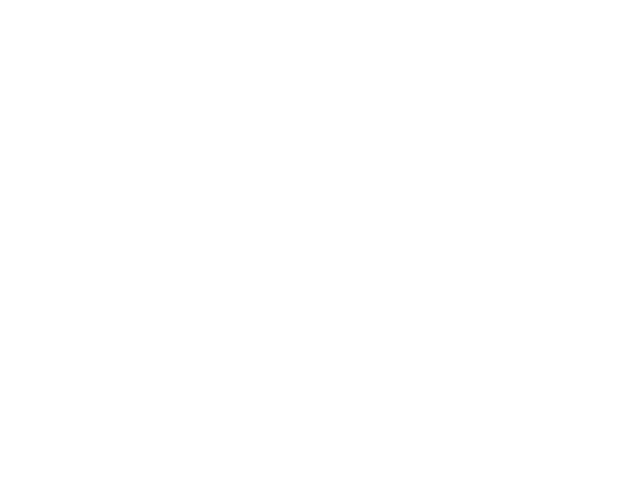

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
print(x_cl[gama, 1])
plt.show()

In [ ]:
# vis = RocketVis(rocket, rocket_obj_path)
# vis.anim_rate = 1.0
# t = t_cl[:-1]
# x = x_cl[:,:-1]
# u = u_cl
# print(t.shape, x.shape, u.shape)
# vis.animate(t, x, u)

In [ ]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
t = t_ol[:-151, 0]
x = x_ol[:,:-151, 0]
u = u_ol[:, :-150, 0]
print(t.shape, x.shape, u.shape)
vis.animate(t, x, u)

NameError: name 't_ol' is not defined